# Libraries

In [1]:
# for data manipulation
import numpy as np
import pandas as pd

# our defined functions for data preparation
import utils.functionsfunctions as ft

# setting option
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

# Load Data

In [2]:
pre_raw = pd.read_csv('Data/dseb63_previous_application.csv')
pre_raw = pre_raw[['SK_ID_CURR']+list(pre_raw.columns[:-1])]
print("Tnstallments payemnts dataset shape:", pre_raw.shape)
pre_raw.head()

Tnstallments payemnts dataset shape: (1413701, 37)


,SK_ID_CURR,SK_ID_PREV,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,293189,2030495,Consumer loans,1730.43000,17145.00000,17145.00000,0.00000,17145.00000,SATURDAY,15,Y,1,0.00000,0.18283,0.86734,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.00000,middle,POS mobile with interest,365243.00000,-42.00000,300.00000,-42.00000,-37.00000,0.00000
1,293189,1696966,Consumer loans,68258.65500,1800000.00000,1754721.00000,180000.00000,1800000.00000,SATURDAY,18,Y,1,0.10133,NaN,NaN,XAP,Refused,-472,Cash through the bank,SCO,NaN,Repeater,Clothing and Accessories,POS,XNA,Regional / Local,55,Furniture,36.00000,low_normal,POS industry with interest,NaN,NaN,NaN,NaN,NaN,NaN
2,293189,2154916,Consumer loans,12417.39000,108400.50000,119848.50000,0.00000,108400.50000,SUNDAY,14,Y,1,0.00000,NaN,NaN,XAP,Approved,-548,Cash through the bank,XAP,NaN,New,Furniture,POS,XNA,Stone,196,Furniture,12.00000,middle,POS industry with interest,365243.00000,-512.00000,-182.00000,-392.00000,-387.00000,0.00000
3,91587,2802425,Cash loans,25188.61500,607500.00000,679671.00000,NaN,607500.00000,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.00000,low_action,Cash X-Sell: low,365243.00000,-134.00000,916.00000,365243.00000,365243.00000,1.00000
4,91587,1536272,Cash loans,21709.12500,450000.00000,512370.00000,NaN,450000.00000,WEDNESDAY,9,Y,1,NaN,NaN,NaN,XNA,Approved,-515,XNA,XAP,NaN,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),6,XNA,36.00000,low_normal,Cash X-Sell: low,365243.00000,-485.00000,565.00000,-155.00000,-147.00000,1.00000


In [3]:
# file contains only SK_ID_CURR and TARGET from train_test (defined in DP_TRAIN_TEST notebook)
id_target = pd.read_csv("Data/dseb63_id_target.csv", index_col=0)
id_target.head()

,SK_ID_CURR,TARGET
0,278621,0.00000
1,139008,0.00000
2,138348,0.00000
3,64140,0.00000
4,219374,0.00000


# Data Preparation

__1. Check missing values__

In [4]:
pre = pre_raw.copy()

In [5]:
pre_nan = ft.check_nan(pre)
pre_nan

,nan,%nan
RATE_INTEREST_PRIVILEGED,1408910,99.66110
RATE_INTEREST_PRIMARY,1408910,99.66110
AMT_DOWN_PAYMENT,749540,53.01970
RATE_DOWN_PAYMENT,749540,53.01970
NAME_TYPE_SUITE,694672,49.13854
NFLAG_INSURED_ON_APPROVAL,561106,39.69057
DAYS_TERMINATION,561106,39.69057
DAYS_LAST_DUE,561106,39.69057
DAYS_LAST_DUE_1ST_VERSION,561106,39.69057
DAYS_FIRST_DUE,561106,39.69057


__COMMENTS__
* As we can see, the first 5 columns in the check_nan dataframe above having more than 40% NaN values, so we will drop them.

In [6]:
drop_columns = pre_nan[pre_nan['%nan']>40].index
pre = pre.drop(columns=drop_columns)

__2. Check correlation__

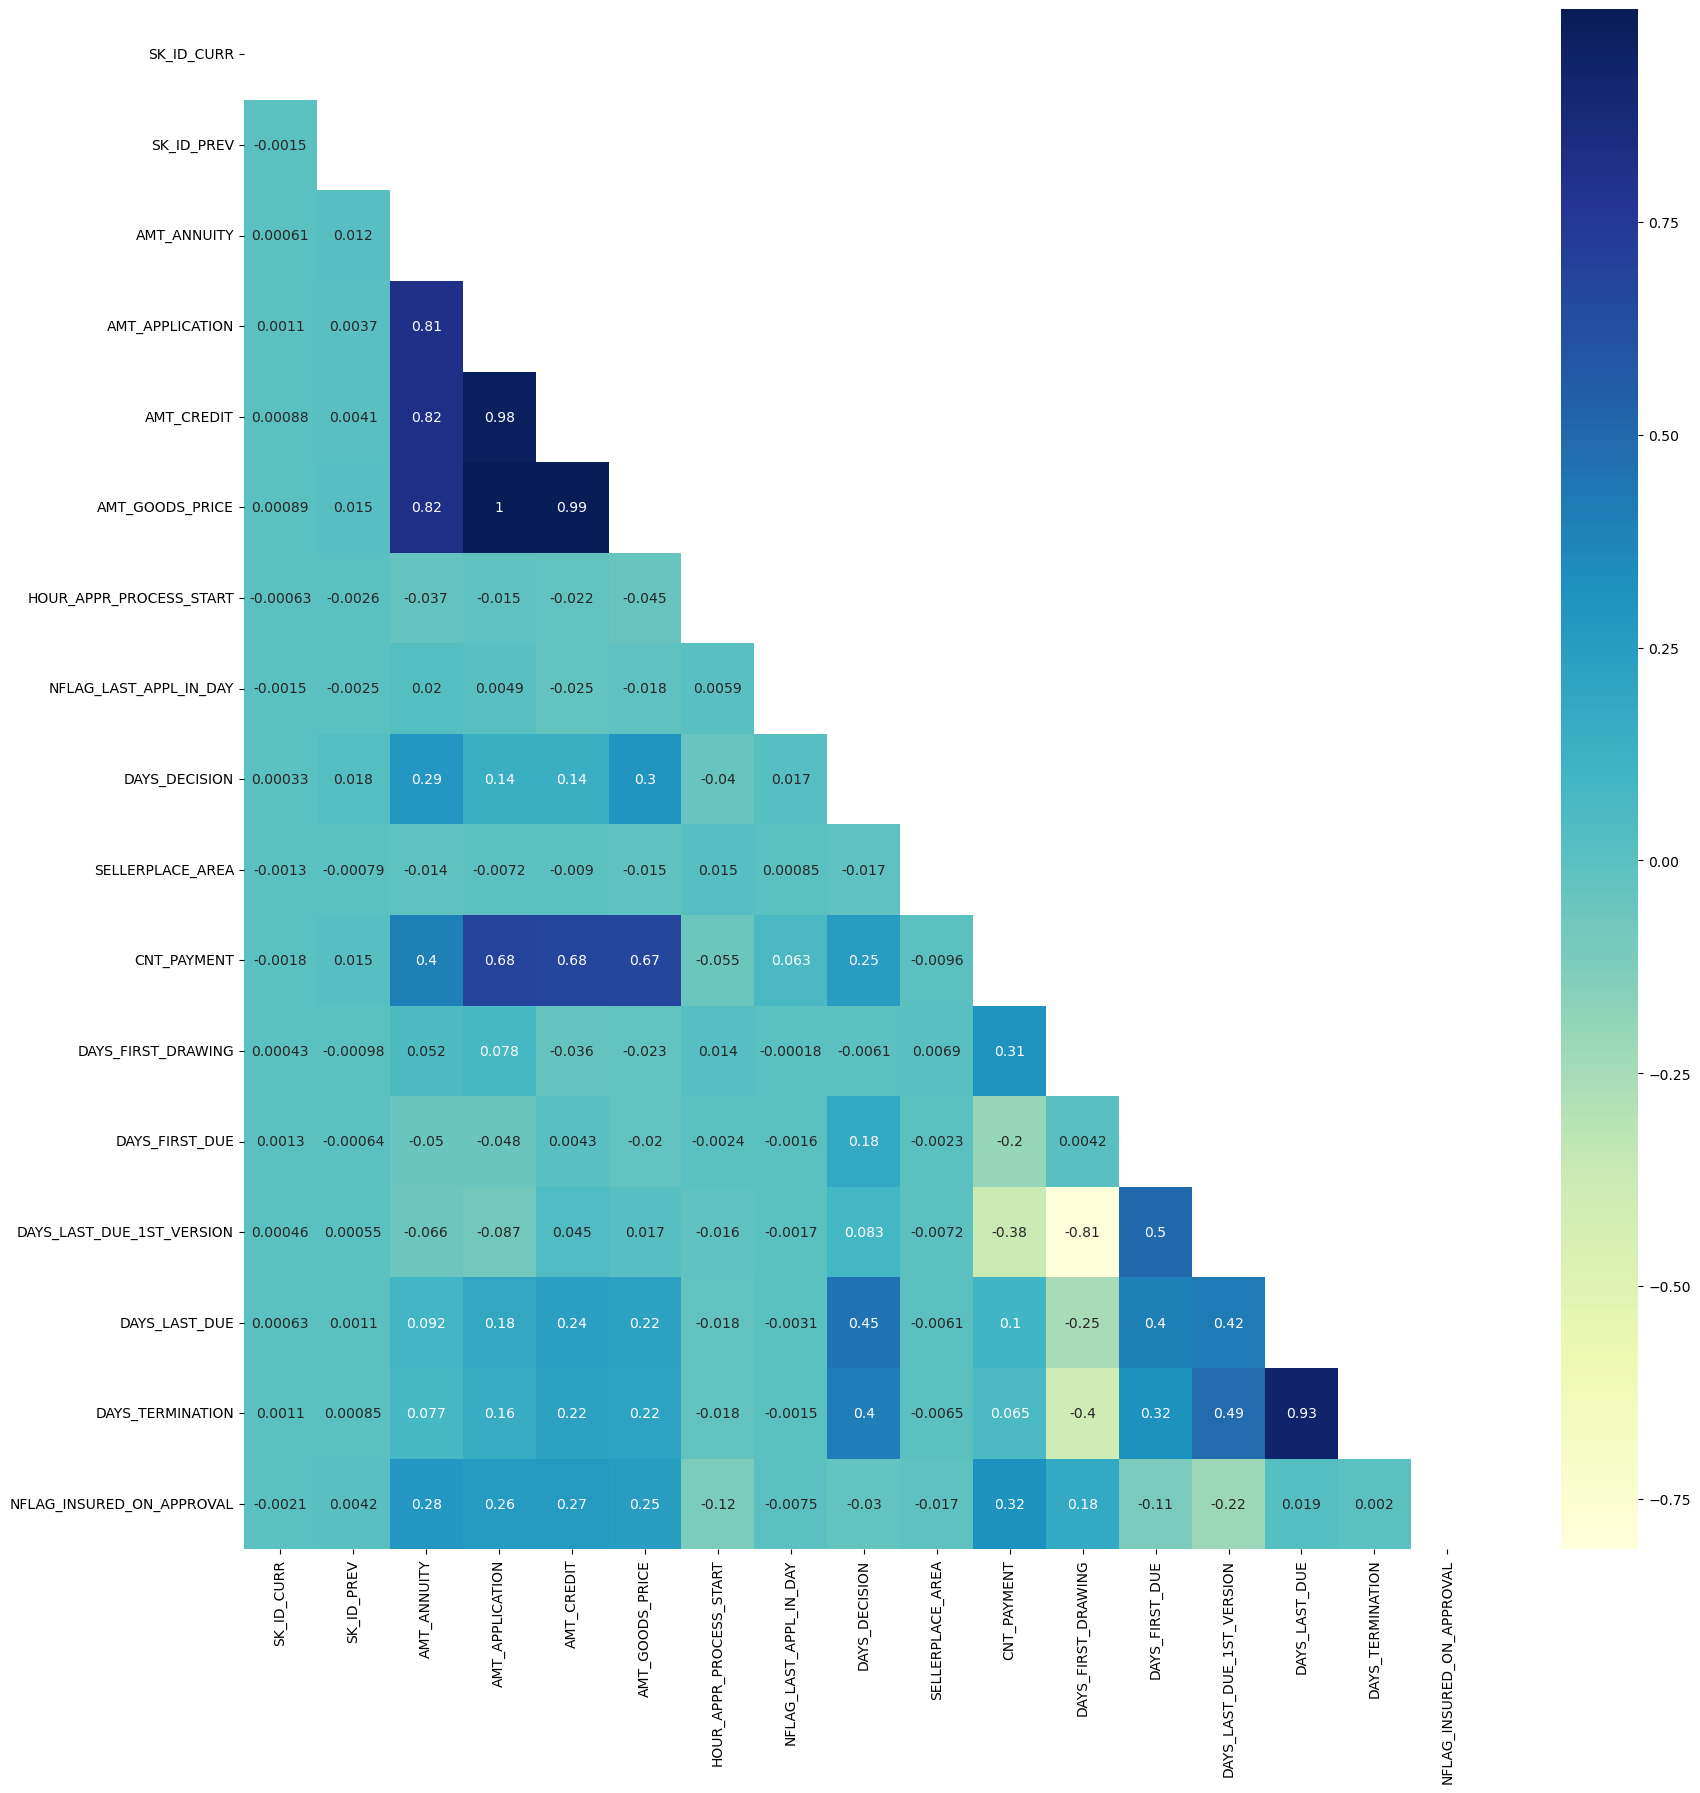

In [7]:
ft.check_corr(pre.select_dtypes(exclude='object'))

__COMMENTS__
* As we can see, 4 features `AMT_ANNUITY`, `AMT_CREDIT`, `AMT_APPLICATION`, `AMT_GOOD_PRICE` having high correlation to each other, which might lead to the identical effects on `TARGET`. Hence, we could only keep one of them and we will keep `AMT_CREDIT`.
* Same with two other case: (`DAYS_LAST_DUE`, `DAYS_TERMINATION`) and (`DAYS_FIRST_DRAWING`, `DAYS_LAST_DUE_1ST_VERSION`), so we will remove `DAYS_LAST_DUE`.

In [8]:
drop_cols = ['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'AMT_APPLICATION', 'DAYS_LAST_DUE', 'DAYS_FIRST_DRAWING']
pre = pre.drop(columns=drop_cols)

__3. Other basic information about the data__

In [9]:
ft.data_explore(pre)

,info
Rows,1413701
Features,27
Duplicate Rows,0
object,15
int64,6
float64,6


In [10]:
ft.multi_features_explore(pre)

index,dtype,nonnull,%nonnull,nan,%nan,nunique,nunique_nan,max,min,mean,std,unique,frequency,%value,most
SK_ID_CURR,int64,1413701,1.00000,0,0.00000,291057,291057,307510,0,153764.66736,88673.91986,NaN,NaN,NaN,NaN
SK_ID_PREV,int64,1413701,1.00000,0,0.00000,1413701,1413701,2845381,1000001,1922744.33061,532715.33525,NaN,NaN,NaN,NaN
NAME_CONTRACT_TYPE,object,1413701,1.00000,0,0.00000,4,4,NaN,NaN,NaN,NaN,"[Consumer loans, Cash loans, Revolving loans, XNA]","{'Cash loans': 626764, 'Consumer loans': 625256, 'Revolving loans': 161368, 'XNA': 313}","{'Cash loans': 0.44, 'Consumer loans': 0.44, 'Revolving loans': 0.11, 'XNA': 0.0}",[Cash loans]
AMT_CREDIT,float64,1413700,1.00000,1,0.00000,81730,81731,4509688.50000,0.00000,196354.08612,319481.25072,NaN,NaN,NaN,NaN
WEEKDAY_APPR_PROCESS_START,object,1413701,1.00000,0,0.00000,7,7,NaN,NaN,NaN,NaN,"[SATURDAY, SUNDAY, THURSDAY, WEDNESDAY, TUESDAY, FRIDAY, MONDAY]","{'WEDNESDAY': 215519, 'TUESDAY': 215058, 'MONDAY': 214509, 'FRIDAY': 213373, 'THURSDAY': 211005, 'SATURDAY': 204159, 'SUNDAY': 140078}","{'WEDNESDAY': 0.15, 'TUESDAY': 0.15, 'MONDAY': 0.15, 'FRIDAY': 0.15, 'THURSDAY': 0.15, 'SATURDAY': 0.14, 'SUNDAY': 0.1}",[WEDNESDAY]
HOUR_APPR_PROCESS_START,int64,1413701,1.00000,0,0.00000,24,24,23,0,12.47893,3.33147,NaN,NaN,NaN,NaN
FLAG_LAST_APPL_PER_CONTRACT,object,1413701,1.00000,0,0.00000,2,2,NaN,NaN,NaN,NaN,"[Y, N]","{'Y': 1406387, 'N': 7314}","{'Y': 0.99, 'N': 0.01}",[Y]
NFLAG_LAST_APPL_IN_DAY,int64,1413701,1.00000,0,0.00000,2,2,1,0,0.99643,0.05963,"[1, 0]","{1: 1408657, 0: 5044}","{1: 1.0, 0: 0.0}",NaN
NAME_CASH_LOAN_PURPOSE,object,1413701,1.00000,0,0.00000,25,25,NaN,NaN,NaN,NaN,"[XAP, XNA, Other, Buying a holiday home / land, Repairs, Everyday expenses, Payments on other loans, Urgent needs, Refusal to name the goal, Journey, Furniture, Buying a garage, Building a house or an annex, Education, Wedding / gift / holiday, Buying a home, Medicine, Purchase of electronic equipment, Buying a used car, Buying a new car, Car repairs, Business development, Hobby, Gasification / water supply, Money for a third person]","{'XAP': 786937, 'XNA': 567351, 'Repairs': 20117, 'Other': 13432, 'Urgent needs': 7236, 'Buying a used car': 2469, 'Building a house or an annex': 2344, 'Everyday expenses': 2052, 'Medicine': 1871, 'Payments on other loans': 1573, 'Education': 1334, 'Journey': 1042, 'Purchase of electronic equipment': 934, 'Buying a new car': 886, 'Wedding / gift / holiday': 801, 'Buying a home': 701, 'Car repairs': 691, 'Furniture': 660, 'Buying a holiday home / land': 463, 'Business development': 359, 'Gasification / water supply': 251, 'Buying a garage': 116, 'Hobby': 45, 'Money for a third person': 23, 'Refusal to name the goal': 13}","{'XAP': 0.56, 'XNA': 0.4, 'Repairs': 0.01, 'Other': 0.01, 'Urgent needs': 0.01, 'Buying a used car': 0.0, 'Building a house or an annex': 0.0, 'Everyday expenses': 0.0, 'Medicine': 0.0, 'Payments on other loans': 0.0, 'Education': 0.0, 'Journey': 0.0, 'Purchase of electronic equipment': 0.0, 'Buying a new car': 0.0, 'Wedding / gift / holiday': 0.0, 'Buying a home': 0.0, 'Car repairs': 0.0, 'Furniture': 0.0, 'Buying a holiday home / land': 0.0, 'Business development': 0.0, 'Gasification / water supply': 0.0, 'Buying a garage': 0.0, 'Hobby': 0.0, 'Money for a third person': 0.0, 'Refusal to name the goal': 0.0}",[XAP]
NAME_CONTRACT_STATUS,object,1413701,1.00000,0,0.00000,4,4,NaN,NaN,NaN,NaN,"[Approved, Refused, Canceled, Unused offer]","{'Approved': 886099, 'Canceled': 259441, 'Refused': 245390, 'Unused offer': 22771}","{'Approved': 0.63, 'Canceled': 0.18, 'Refused': 0.17, 'Unused offer': 0.02}",[Approved]


__COMMENTS__
* * `XNA` seems to represent missing values but not having been defined by np.nan yet. We need to replace `XNA` with np.nan.
* `XAP` seems to have no meaning, but if we observe more carefully, we can see that it might show that this features does not belong to this record. For example:
    * Most of the contracts having `XAP` in `CODE_REJECT_REASON` were `Approved` or `Canceled` in `NAME_CONTRACT_STATUS`. So because they were not refused, they did not have the `CODE_REJECT_REASON`.
    * Most of the contracts having `XAP` in `NAME_CASH_LOAN_PURPOSE` were `Consumer loans` or `Revolving loans` in `NAME_CONTRACT_TYPE`. So because they were not Cash loans, they did not have the `NAME_CASH_LOAN_PURPOSE`.

In [11]:
pre = pre.replace('XNA', np.nan)

In [12]:
# Example of XAP values
pre[pre['CODE_REJECT_REASON']=='XAP']['NAME_CONTRACT_STATUS'].value_counts()

NAME_CONTRACT_STATUS
Approved    886091
Canceled    259441
Refused          1
Name: count, dtype: int64

In [13]:
# Example of XAP values
pre[pre['NAME_CASH_LOAN_PURPOSE']=='XAP']['NAME_CONTRACT_TYPE'].value_counts()

NAME_CONTRACT_TYPE
Consumer loans     625256
Revolving loans    161368
Name: count, dtype: int64

__4. Check for outliers using boxplot__

In [14]:
pre_numcols = pre.select_dtypes(exclude='object').columns[2:]

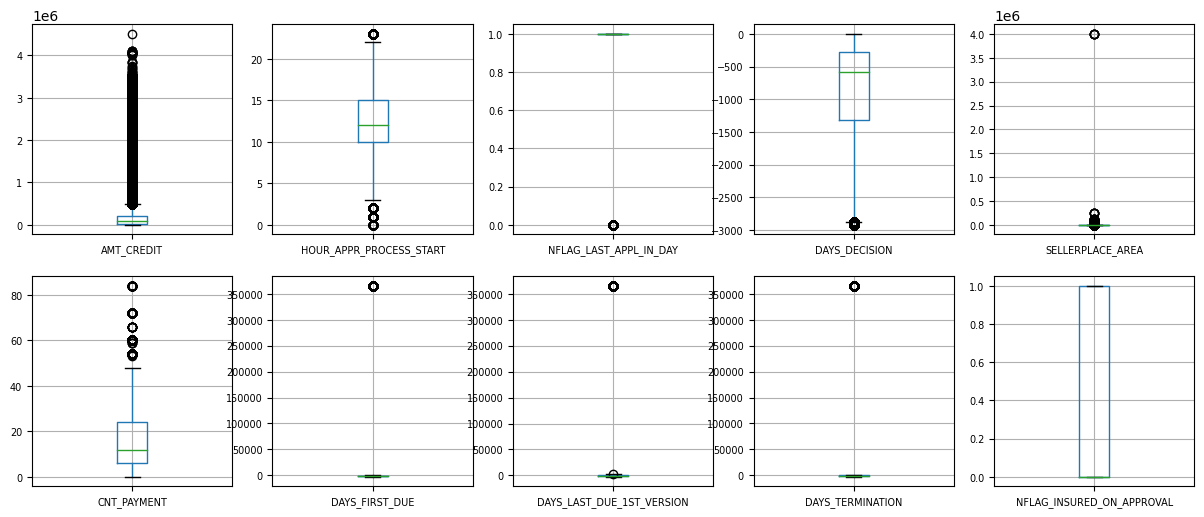

In [15]:
ft.num_dist_boxplot(data=pre[pre_numcols], nrows=2, ncols=5, figsize=(15, 6), fontsize=7)

__COMMENTS__
* As we can see, all DAYS features, except `DAYS_DECISION`, have outlier of `365243` and this values can be considered as an abnormality by replace it by `np.nan` after creating new columns to capture all of records containing them.

In [16]:
# Capture the abnormality
pre['FLAG_DAYS_LAST_DUE_ANOM'] = pre["DAYS_LAST_DUE_1ST_VERSION"].apply(lambda x: 0 if x != 365243 else 1)
pre['FLAG_DAYS_TERMINATION_ANOM'] = pre["DAYS_TERMINATION"].apply(lambda x: 0 if x != 365243 else 1)
pre['FLAG_DAYS_FIRST_DUE_ANOM'] = pre["DAYS_FIRST_DUE"].apply(lambda x: 0 if x != 365243 else 1)

# Replace abnormality by np.nan
pre = pre.replace(365243, np.nan)

__5. Dealing with categorical features__

In [17]:
pre_cat = ft.sub_cate_norm(pre, 'SK_ID_CURR', 'PRE').reset_index()
pre_cat.head()

,SK_ID_CURR,PRE_NAME_CONTRACT_TYPE_Cash loans_count,PRE_NAME_CONTRACT_TYPE_Cash loans_norm,PRE_NAME_CONTRACT_TYPE_Consumer loans_count,PRE_NAME_CONTRACT_TYPE_Consumer loans_norm,PRE_NAME_CONTRACT_TYPE_Revolving loans_count,PRE_NAME_CONTRACT_TYPE_Revolving loans_norm,PRE_WEEKDAY_APPR_PROCESS_START_FRIDAY_count,PRE_WEEKDAY_APPR_PROCESS_START_FRIDAY_norm,PRE_WEEKDAY_APPR_PROCESS_START_MONDAY_count,PRE_WEEKDAY_APPR_PROCESS_START_MONDAY_norm,PRE_WEEKDAY_APPR_PROCESS_START_SATURDAY_count,PRE_WEEKDAY_APPR_PROCESS_START_SATURDAY_norm,PRE_WEEKDAY_APPR_PROCESS_START_SUNDAY_count,PRE_WEEKDAY_APPR_PROCESS_START_SUNDAY_norm,PRE_WEEKDAY_APPR_PROCESS_START_THURSDAY_count,PRE_WEEKDAY_APPR_PROCESS_START_THURSDAY_norm,PRE_WEEKDAY_APPR_PROCESS_START_TUESDAY_count,PRE_WEEKDAY_APPR_PROCESS_START_TUESDAY_norm,PRE_WEEKDAY_APPR_PROCESS_START_WEDNESDAY_count,PRE_WEEKDAY_APPR_PROCESS_START_WEDNESDAY_norm,PRE_FLAG_LAST_APPL_PER_CONTRACT_N_count,PRE_FLAG_LAST_APPL_PER_CONTRACT_N_norm,PRE_FLAG_LAST_APPL_PER_CONTRACT_Y_count,PRE_FLAG_LAST_APPL_PER_CONTRACT_Y_norm,PRE_NAME_CASH_LOAN_PURPOSE_Building a house or an annex_count,PRE_NAME_CASH_LOAN_PURPOSE_Building a house or an annex_norm,PRE_NAME_CASH_LOAN_PURPOSE_Business development_count,PRE_NAME_CASH_LOAN_PURPOSE_Business development_norm,PRE_NAME_CASH_LOAN_PURPOSE_Buying a garage_count,PRE_NAME_CASH_LOAN_PURPOSE_Buying a garage_norm,PRE_NAME_CASH_LOAN_PURPOSE_Buying a holiday home / land_count,PRE_NAME_CASH_LOAN_PURPOSE_Buying a holiday home / land_norm,PRE_NAME_CASH_LOAN_PURPOSE_Buying a home_count,PRE_NAME_CASH_LOAN_PURPOSE_Buying a home_norm,PRE_NAME_CASH_LOAN_PURPOSE_Buying a new car_count,PRE_NAME_CASH_LOAN_PURPOSE_Buying a new car_norm,PRE_NAME_CASH_LOAN_PURPOSE_Buying a used car_count,PRE_NAME_CASH_LOAN_PURPOSE_Buying a used car_norm,PRE_NAME_CASH_LOAN_PURPOSE_Car repairs_count,PRE_NAME_CASH_LOAN_PURPOSE_Car repairs_norm,PRE_NAME_CASH_LOAN_PURPOSE_Education_count,PRE_NAME_CASH_LOAN_PURPOSE_Education_norm,PRE_NAME_CASH_LOAN_PURPOSE_Everyday expenses_count,PRE_NAME_CASH_LOAN_PURPOSE_Everyday expenses_norm,PRE_NAME_CASH_LOAN_PURPOSE_Furniture_count,PRE_NAME_CASH_LOAN_PURPOSE_Furniture_norm,PRE_NAME_CASH_LOAN_PURPOSE_Gasification / water supply_count,PRE_NAME_CASH_LOAN_PURPOSE_Gasification / water supply_norm,PRE_NAME_CASH_LOAN_PURPOSE_Hobby_count,PRE_NAME_CASH_LOAN_PURPOSE_Hobby_norm,PRE_NAME_CASH_LOAN_PURPOSE_Journey_count,PRE_NAME_CASH_LOAN_PURPOSE_Journey_norm,PRE_NAME_CASH_LOAN_PURPOSE_Medicine_count,PRE_NAME_CASH_LOAN_PURPOSE_Medicine_norm,PRE_NAME_CASH_LOAN_PURPOSE_Money for a third person_count,PRE_NAME_CASH_LOAN_PURPOSE_Money for a third person_norm,PRE_NAME_CASH_LOAN_PURPOSE_Other_count,PRE_NAME_CASH_LOAN_PURPOSE_Other_norm,PRE_NAME_CASH_LOAN_PURPOSE_Payments on other loans_count,PRE_NAME_CASH_LOAN_PURPOSE_Payments on other loans_norm,PRE_NAME_CASH_LOAN_PURPOSE_Purchase of electronic equipment_count,PRE_NAME_CASH_LOAN_PURPOSE_Purchase of electronic equipment_norm,PRE_NAME_CASH_LOAN_PURPOSE_Refusal to name the goal_count,PRE_NAME_CASH_LOAN_PURPOSE_Refusal to name the goal_norm,PRE_NAME_CASH_LOAN_PURPOSE_Repairs_count,PRE_NAME_CASH_LOAN_PURPOSE_Repairs_norm,PRE_NAME_CASH_LOAN_PURPOSE_Urgent needs_count,PRE_NAME_CASH_LOAN_PURPOSE_Urgent needs_norm,PRE_NAME_CASH_LOAN_PURPOSE_Wedding / gift / holiday_count,PRE_NAME_CASH_LOAN_PURPOSE_Wedding / gift / holiday_norm,PRE_NAME_CASH_LOAN_PURPOSE_XAP_count,PRE_NAME_CASH_LOAN_PURPOSE_XAP_norm,PRE_NAME_CONTRACT_STATUS_Approved_count,PRE_NAME_CONTRACT_STATUS_Approved_norm,PRE_NAME_CONTRACT_STATUS_Canceled_count,PRE_NAME_CONTRACT_STATUS_Canceled_norm,PRE_NAME_CONTRACT_STATUS_Refused_count,PRE_NAME_CONTRACT_STATUS_Refused_norm,PRE_NAME_CONTRACT_STATUS_Unused offer_count,PRE_NAME_CONTRACT_STATUS_Unused offer_norm,PRE_NAME_PAYMENT_TYPE_Cash through the bank_count,PRE_NAME_PAYMENT_TYPE_Cash through the bank_norm,PRE_NAME_PAYMENT_TYPE_Cashless from the account of the employer_count,PRE_NAME_PAYMENT_TYPE_Cashless from the account of the employer_norm,PRE_NAME_PAYME

__6. Dealing with numerical features__

In [18]:
pre_count = pre.groupby("SK_ID_CURR")['SK_ID_PREV'].count().reset_index()
pre_count = pre_count.rename(columns={'SK_ID_PREV': 'CNT_PREV'})
pre_count.head()

,SK_ID_CURR,CNT_PREV
0,0,6
1,1,7
2,2,4
3,3,6
4,4,1


In [19]:
pre_num = ft.sub_num_agg(pre, 'SK_ID_CURR', 'PRE')
pre_num.head()

,SK_ID_CURR,PRE_AMT_CREDIT_min,PRE_AMT_CREDIT_max,PRE_AMT_CREDIT_mean,PRE_AMT_CREDIT_sum,PRE_HOUR_APPR_PROCESS_START_min,PRE_HOUR_APPR_PROCESS_START_max,PRE_HOUR_APPR_PROCESS_START_mean,PRE_HOUR_APPR_PROCESS_START_sum,PRE_NFLAG_LAST_APPL_IN_DAY_min,PRE_NFLAG_LAST_APPL_IN_DAY_max,PRE_NFLAG_LAST_APPL_IN_DAY_mean,PRE_NFLAG_LAST_APPL_IN_DAY_sum,PRE_DAYS_DECISION_min,PRE_DAYS_DECISION_max,PRE_DAYS_DECISION_mean,PRE_DAYS_DECISION_sum,PRE_SELLERPLACE_AREA_min,PRE_SELLERPLACE_AREA_max,PRE_SELLERPLACE_AREA_mean,PRE_SELLERPLACE_AREA_sum,PRE_CNT_PAYMENT_min,PRE_CNT_PAYMENT_max,PRE_CNT_PAYMENT_mean,PRE_CNT_PAYMENT_sum,PRE_DAYS_FIRST_DUE_min,PRE_DAYS_FIRST_DUE_max,PRE_DAYS_FIRST_DUE_mean,PRE_DAYS_FIRST_DUE_sum,PRE_DAYS_LAST_DUE_1ST_VERSION_min,PRE_DAYS_LAST_DUE_1ST_VERSION_max,PRE_DAYS_LAST_DUE_1ST_VERSION_mean,PRE_DAYS_LAST_DUE_1ST_VERSION_sum,PRE_DAYS_TERMINATION_min,PRE_DAYS_TERMINATION_max,PRE_DAYS_TERMINATION_mean,PRE_DAYS_TERMINATION_sum,PRE_NFLAG_INSURED_ON_APPROVAL_min,PRE_NFLAG_INSURED_ON_APPROVAL_max,PRE_NFLAG_INSURED_ON_APPROVAL_mean,PRE_NFLAG_INSURED_ON_APPROVAL_sum,PRE_FLAG_DAYS_LAST_DUE_ANOM_min,PRE_FLAG_DAYS_LAST_DUE_ANOM_max,PRE_FLAG_DAYS_LAST_DUE_ANOM_mean,PRE_FLAG_DAYS_LAST_DUE_ANOM_sum,PRE_FLAG_DAYS_TERMINATION_ANOM_min,PRE_FLAG_DAYS_TERMINATION_ANOM_max,PRE_FLAG_DAYS_TERMINATION_ANOM_mean,PRE_FLAG_DAYS_TERMINATION_ANOM_sum,PRE_FLAG_DAYS_FIRST_DUE_ANOM_min,PRE_FLAG_DAYS_FIRST_DUE_ANOM_max,PRE_FLAG_DAYS_FIRST_DUE_ANOM_mean,PRE_FLAG_DAYS_FIRST_DUE_ANOM_sum
0,0,21928.50000,120658.50000,77853.75000,467122.50000,11,16,14.83333,89,1,1,1.00000,6,-455,-21,-197.00000,-1182,10,2326,1169.66667,7018,0.00000,24.00000,10.66667,64.00000,-419.00000,-60.00000,-192.50000,-770.00000,-149.00000,343.00000,95.75000,383.00000,-290.00000,-24.00000,-159.33333,-478.00000,0.00000,0.00000,0.00000,0.00000,0,1,0.16667,1,0,1,0.33333,2,0,1,0.16667,1
1,1,0.00000,384277.50000,74634.42857,522441.00000,12,14,12.71429,89,1,1,1.00000,7,-1619,-273,-525.57143,-3679,1,110,16.57143,116,0.00000,36.00000,15.33333,46.00000,-1588.00000,-232.00000,-828.33333,-2485.00000,-1318.00000,385.00000,-466.50000,-933.00000,-1314.00000,-362.00000,-838.00000,-1676.00000,0.00000,1.00000,0.33333,1.00000,0,1,0.14286,1,0,1,0.14286,1,0,0,0.00000,0
2,2,14170.50000,239850.00000,87738.75000,350955.00000,9,14,12.25000,49,1,1,1.00000,4,-2490,-1055,-1917.00000,-7668,18,90,54.50000,218,6.00000,12.00000,9.50000,38.00000,-2454.00000,-1025.00000,-1882.00000,-7528.00000,-2184.00000,-695.00000,-1627.00000,-6508.00000,-2236.00000,-688.00000,-1681.00000,-6724.00000,0.00000,1.00000,0.50000,2.00000,0,0,0.00000,0,0,0,0.00000,0,0,0,0.00000,0
3,3,0.00000,135000.00000,43401.00000,260406.00000,10,18,15.00000,90,1,1,1.00000,6,-725,-55,-360.83333,-2165,-1,1684,520.16667,3121,0.00000,12.00000,8.50000,34.00000,-694.00000,-277.00000,-411.25000,-1645.00000,-424.00000,53.00000,-144.33333,-433.00000,-660.00000,-150.00000,-369.00000,-1107.00000,0.00000,0.00000,0.00000,0.00000,0,1,0.16667,1,0,1,0.16667,1,0,0,0.00000,0
4,4,44631.00000,44631.00000,44631.00000,44631.00000,13,13,13.00000,13,1,1,1.00000,1,-2390,-2390,-2390.00000,-2390,71,71,71.00000,71,6.00000,6.00000,6.00000,6.00000,-2357.00000,-2357.00000,-2357.00000,-2357.00000,-2207.00000,-2207.00000,-2207.00000,-2207.00000,-2200.00000,-2200.00000,-2200.00000,-2200.00000,1.00000,1.00000,1.00000,1.00000,0,0,0.00000,0,0,0,0.00000,0,0,0,0.00000,0


__7. Merge categorical and numerical features together__

In [20]:
pre_merge = pre_count.merge(pre_cat, on='SK_ID_CURR', how='left')
pre_merge = pre_merge.merge(pre_num, on='SK_ID_CURR', how='left')
pre_merge.head()

,SK_ID_CURR,CNT_PREV,PRE_NAME_CONTRACT_TYPE_Cash loans_count,PRE_NAME_CONTRACT_TYPE_Cash loans_norm,PRE_NAME_CONTRACT_TYPE_Consumer loans_count,PRE_NAME_CONTRACT_TYPE_Consumer loans_norm,PRE_NAME_CONTRACT_TYPE_Revolving loans_count,PRE_NAME_CONTRACT_TYPE_Revolving loans_norm,PRE_WEEKDAY_APPR_PROCESS_START_FRIDAY_count,PRE_WEEKDAY_APPR_PROCESS_START_FRIDAY_norm,PRE_WEEKDAY_APPR_PROCESS_START_MONDAY_count,PRE_WEEKDAY_APPR_PROCESS_START_MONDAY_norm,PRE_WEEKDAY_APPR_PROCESS_START_SATURDAY_count,PRE_WEEKDAY_APPR_PROCESS_START_SATURDAY_norm,PRE_WEEKDAY_APPR_PROCESS_START_SUNDAY_count,PRE_WEEKDAY_APPR_PROCESS_START_SUNDAY_norm,PRE_WEEKDAY_APPR_PROCESS_START_THURSDAY_count,PRE_WEEKDAY_APPR_PROCESS_START_THURSDAY_norm,PRE_WEEKDAY_APPR_PROCESS_START_TUESDAY_count,PRE_WEEKDAY_APPR_PROCESS_START_TUESDAY_norm,PRE_WEEKDAY_APPR_PROCESS_START_WEDNESDAY_count,PRE_WEEKDAY_APPR_PROCESS_START_WEDNESDAY_norm,PRE_FLAG_LAST_APPL_PER_CONTRACT_N_count,PRE_FLAG_LAST_APPL_PER_CONTRACT_N_norm,PRE_FLAG_LAST_APPL_PER_CONTRACT_Y_count,PRE_FLAG_LAST_APPL_PER_CONTRACT_Y_norm,PRE_NAME_CASH_LOAN_PURPOSE_Building a house or an annex_count,PRE_NAME_CASH_LOAN_PURPOSE_Building a house or an annex_norm,PRE_NAME_CASH_LOAN_PURPOSE_Business development_count,PRE_NAME_CASH_LOAN_PURPOSE_Business development_norm,PRE_NAME_CASH_LOAN_PURPOSE_Buying a garage_count,PRE_NAME_CASH_LOAN_PURPOSE_Buying a garage_norm,PRE_NAME_CASH_LOAN_PURPOSE_Buying a holiday home / land_count,PRE_NAME_CASH_LOAN_PURPOSE_Buying a holiday home / land_norm,PRE_NAME_CASH_LOAN_PURPOSE_Buying a home_count,PRE_NAME_CASH_LOAN_PURPOSE_Buying a home_norm,PRE_NAME_CASH_LOAN_PURPOSE_Buying a new car_count,PRE_NAME_CASH_LOAN_PURPOSE_Buying a new car_norm,PRE_NAME_CASH_LOAN_PURPOSE_Buying a used car_count,PRE_NAME_CASH_LOAN_PURPOSE_Buying a used car_norm,PRE_NAME_CASH_LOAN_PURPOSE_Car repairs_count,PRE_NAME_CASH_LOAN_PURPOSE_Car repairs_norm,PRE_NAME_CASH_LOAN_PURPOSE_Education_count,PRE_NAME_CASH_LOAN_PURPOSE_Education_norm,PRE_NAME_CASH_LOAN_PURPOSE_Everyday expenses_count,PRE_NAME_CASH_LOAN_PURPOSE_Everyday expenses_norm,PRE_NAME_CASH_LOAN_PURPOSE_Furniture_count,PRE_NAME_CASH_LOAN_PURPOSE_Furniture_norm,PRE_NAME_CASH_LOAN_PURPOSE_Gasification / water supply_count,PRE_NAME_CASH_LOAN_PURPOSE_Gasification / water supply_norm,PRE_NAME_CASH_LOAN_PURPOSE_Hobby_count,PRE_NAME_CASH_LOAN_PURPOSE_Hobby_norm,PRE_NAME_CASH_LOAN_PURPOSE_Journey_count,PRE_NAME_CASH_LOAN_PURPOSE_Journey_norm,PRE_NAME_CASH_LOAN_PURPOSE_Medicine_count,PRE_NAME_CASH_LOAN_PURPOSE_Medicine_norm,PRE_NAME_CASH_LOAN_PURPOSE_Money for a third person_count,PRE_NAME_CASH_LOAN_PURPOSE_Money for a third person_norm,PRE_NAME_CASH_LOAN_PURPOSE_Other_count,PRE_NAME_CASH_LOAN_PURPOSE_Other_norm,PRE_NAME_CASH_LOAN_PURPOSE_Payments on other loans_count,PRE_NAME_CASH_LOAN_PURPOSE_Payments on other loans_norm,PRE_NAME_CASH_LOAN_PURPOSE_Purchase of electronic equipment_count,PRE_NAME_CASH_LOAN_PURPOSE_Purchase of electronic equipment_norm,PRE_NAME_CASH_LOAN_PURPOSE_Refusal to name the goal_count,PRE_NAME_CASH_LOAN_PURPOSE_Refusal to name the goal_norm,PRE_NAME_CASH_LOAN_PURPOSE_Repairs_count,PRE_NAME_CASH_LOAN_PURPOSE_Repairs_norm,PRE_NAME_CASH_LOAN_PURPOSE_Urgent needs_count,PRE_NAME_CASH_LOAN_PURPOSE_Urgent needs_norm,PRE_NAME_CASH_LOAN_PURPOSE_Wedding / gift / holiday_count,PRE_NAME_CASH_LOAN_PURPOSE_Wedding / gift / holiday_norm,PRE_NAME_CASH_LOAN_PURPOSE_XAP_count,PRE_NAME_CASH_LOAN_PURPOSE_XAP_norm,PRE_NAME_CONTRACT_STATUS_Approved_count,PRE_NAME_CONTRACT_STATUS_Approved_norm,PRE_NAME_CONTRACT_STATUS_Canceled_count,PRE_NAME_CONTRACT_STATUS_Canceled_norm,PRE_NAME_CONTRACT_STATUS_Refused_count,PRE_NAME_CONTRACT_STATUS_Refused_norm,PRE_NAME_CONTRACT_STATUS_Unused offer_count,PRE_NAME_CONTRACT_STATUS_Unused offer_norm,PRE_NAME_PAYMENT_TYPE_Cash through the bank_count,PRE_NAME_PAYMENT_TYPE_Cash through the bank_norm,PRE_NAME_PAYMENT_TYPE_Cashless from the account of the employer_count,PRE_NAME_PAYMENT_TYPE_Cashless from the account of the employer_norm,PRE_N

__8. Scaling__

In [21]:
pre_scaled = pre_merge.copy()
pre_scaled.iloc[:, 1:] = ft.scale_df_full(pre_scaled.iloc[:, 1:], method='standard')

__9. Filling missing values__

In [22]:
# merge with SK_ID_CURR and TARGET of the train/test to fillna in the whole set
pre_final = id_target.merge(pre_scaled, on='SK_ID_CURR', how='left')

# Fillna with 0
pre_final.iloc[:, 2:] = ft.fillna(pre_final.iloc[:, 2:], 'constant', 0)

__10. Saving files__

In [23]:
pre_final.to_csv("prepared_files/dp_previous.csv")